# <center> EE4708: Data Analytics Laboratory </center>
# <center> Final Exam </center>
# <center> Gautham Govind A, EE19B022 </center>

## Loading necessary libraries

In [180]:
!pip install keras

     |████████████████████████████████| 1.7 MB 9.9 MB/s eta 0:00:01


In [182]:
!pip install tensorflow

     |████████████████████████████████| 578.1 MB 467 bytes/s  0:00:012   |███▌                            | 62.6 MB 1.1 MB/s eta 0:07:57     |██████████▎                     | 185.3 MB 354 kB/s eta 0:18:30     |███████████████▏                | 274.8 MB 4.8 MB/s eta 0:01:04     |███████████████▌                | 279.4 MB 6.2 MB/s eta 0:00:49     |██████████████████              | 327.0 MB 12.1 MB/s eta 0:00:21     |███████████████████             | 343.7 MB 10.6 MB/s eta 0:00:23     |███████████████████▎            | 348.3 MB 10.6 MB/s eta 0:00:22     |██████████████████████████▏     | 472.2 MB 12.1 MB/s eta 0:00:09
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 14.1 MB 96 kB/s  eta 0:00:01
     |████████████████████████████████| 4.7 MB 11 kB/s  eta 0:00:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 438 kB 3.3 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl 

In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import mplfinance as mpf

from sklearn.preprocessing import StandardScaler

from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA

from keras.models import Sequential
from keras.layers import Dense, LSTM

2022-11-15 18:04:23.344035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 18:04:33.091185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib:/home/blaze010/gurobi950/linux64/lib
2022-11-15 18:04:33.091246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 18:04:33.364681: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been regi

In [4]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 7)

s  = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size':15})

## Loading the datasets

We parse the dates by making use of the features available in Pandas library:

In [5]:
df_cognizant = pd.read_csv('Datasets/Cognizant share prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_hcl = pd.read_csv('Datasets/HCL Technologies share prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_hdfc = pd.read_csv('Datasets/HDFC Bank Share Prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_icici = pd.read_csv('Datasets/ICICI Bank Share Prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_infosys = pd.read_csv('Datasets/Infosys Share Prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_sbi = pd.read_csv('Datasets/SBI Share Prices 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')
df_currency = pd.read_csv('Datasets/USD-INR Exchange rate 2019_2021.csv', parse_dates = ['Date'], infer_datetime_format=True, index_col='Date')

We take a brief look at the datasets and check for null values:

In [6]:
df_cognizant.head()

Open       High        Low      Close   Volume
Date                                                           
2019-01-02  62.500000  63.810001  62.500000  63.090000  3045600
2019-01-03  62.360001  62.970001  61.009998  61.099998  3895700
2019-01-04  62.279999  63.799999  61.950001  63.700001  4885600
2019-01-07  63.349998  63.970001  62.799999  63.599998  3940400
2019-01-08  64.269997  64.430000  63.439999  64.320000  3427500

In [7]:
df_cognizant.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694 entries, 2019-01-02 to 2021-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    694 non-null    float64
 1   High    694 non-null    float64
 2   Low     694 non-null    float64
 3   Close   694 non-null    float64
 4   Volume  694 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 32.5 KB


We don't have any null values.

In [8]:
df_hcl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-10-05 to 2021-10-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    248 non-null    float64
 1   High    248 non-null    float64
 2   Low     248 non-null    float64
 3   Close   248 non-null    float64
 4   Volume  248 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB


In [9]:
df_hcl

Open         High          Low        Close      Volume
Date                                                                      
2020-10-05   828.799988   839.200012   815.099976   824.200012  11889998.0
2020-10-06   830.000000   834.500000   822.700012   829.150024   7848500.0
2020-10-07   830.000000   830.599976   823.000000   828.049988   6980002.0
2020-10-08   857.500000   879.000000   844.500000   849.549988  25860257.0
2020-10-09   852.900024   862.500000   849.299988   855.750000   7286954.0
...                 ...          ...          ...          ...         ...
2021-09-28  1304.949951  1304.949951  1254.000000  1269.000000   8572321.0
2021-09-29  1270.000000  1301.449951  1258.800049  1281.199951   4639821.0
2021-09-30  1291.449951  1291.449951  1268.849976  1279.550049   3589722.0
2021-10-01  1274.000000  1284.000000  1260.650024  1273.750000   3372796.0
2021-10-04  1281.500000  1293.599976  1273.750000  1278.800049   1514949.0

[249 rows x 5 columns]

In [10]:
df_hcl[df_hcl.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2020-11-14   NaN   NaN  NaN    NaN     NaN

Since this is only one row, we drop this row.

In [11]:
df_hcl.dropna(inplace=True)

In [12]:
df_hdfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 680 entries, 2019-01-01 to 2021-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    678 non-null    float64
 1   High    678 non-null    float64
 2   Low     678 non-null    float64
 3   Close   678 non-null    float64
 4   Volume  678 non-null    float64
dtypes: float64(5)
memory usage: 31.9 KB


In [13]:
df_hdfc[df_hdfc.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

We drop the two rows:

In [14]:
df_hdfc.dropna(inplace =True)

In [15]:
df_icici.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 680 entries, 2019-01-01 to 2021-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    678 non-null    float64
 1   High    678 non-null    float64
 2   Low     678 non-null    float64
 3   Close   678 non-null    float64
 4   Volume  678 non-null    float64
dtypes: float64(5)
memory usage: 31.9 KB


In [16]:
df_icici[df_icici.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [17]:
df_icici.dropna(inplace =True)

In [18]:
df_infosys.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-10-05 to 2021-10-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    248 non-null    float64
 1   High    248 non-null    float64
 2   Low     248 non-null    float64
 3   Close   248 non-null    float64
 4   Volume  248 non-null    float64
dtypes: float64(5)
memory usage: 11.7 KB


In [19]:
df_infosys[df_infosys.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [20]:
df_infosys.dropna(inplace =True)

In [21]:
df_sbi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 680 entries, 2019-01-01 to 2021-10-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    678 non-null    float64
 1   High    678 non-null    float64
 2   Low     678 non-null    float64
 3   Close   678 non-null    float64
 4   Volume  678 non-null    float64
dtypes: float64(5)
memory usage: 31.9 KB


In [22]:
df_sbi[df_sbi.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [23]:
df_sbi.dropna(inplace =True)

In [24]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2019-01-01 to 2021-10-04
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       699 non-null    float64
 1   High       699 non-null    float64
 2   Low        699 non-null    float64
 3   Close      699 non-null    float64
 4   Adj Close  699 non-null    float64
dtypes: float64(5)
memory usage: 33.8 KB


In [25]:
df_currency[df_currency.isnull().any(axis=1)]

Open  High  Low  Close  Adj Close
Date                                         
2019-05-22   NaN   NaN  NaN    NaN        NaN
2019-09-11   NaN   NaN  NaN    NaN        NaN
2019-09-12   NaN   NaN  NaN    NaN        NaN
2019-09-13   NaN   NaN  NaN    NaN        NaN
2019-09-16   NaN   NaN  NaN    NaN        NaN
2019-09-17   NaN   NaN  NaN    NaN        NaN
2019-09-18   NaN   NaN  NaN    NaN        NaN
2019-09-19   NaN   NaN  NaN    NaN        NaN
2019-09-20   NaN   NaN  NaN    NaN        NaN
2019-09-23   NaN   NaN  NaN    NaN        NaN
2019-09-24   NaN   NaN  NaN    NaN        NaN
2019-09-25   NaN   NaN  NaN    NaN        NaN
2019-09-26   NaN   NaN  NaN    NaN        NaN
2019-09-27   NaN   NaN  NaN    NaN        NaN
2019-09-30   NaN   NaN  NaN    NaN        NaN
2019-10-01   NaN   NaN  NaN    NaN        NaN
2019-10-02   NaN   NaN  NaN    NaN        NaN
2019-10-03   NaN   NaN  NaN    NaN        NaN
2019-10-04   NaN   NaN  NaN    NaN        NaN
2019-10-07   NaN   NaN  NaN    NaN        NaN
2019-10-09   NaN   NaN  NaN    NaN        NaN

Although we do have 21 missing rows, we still drop them as these rows lack information regarding any of the five features.

In [26]:
df_currency.dropna(inplace =True)

## Exploratory Data Analysis

### Tech stocks

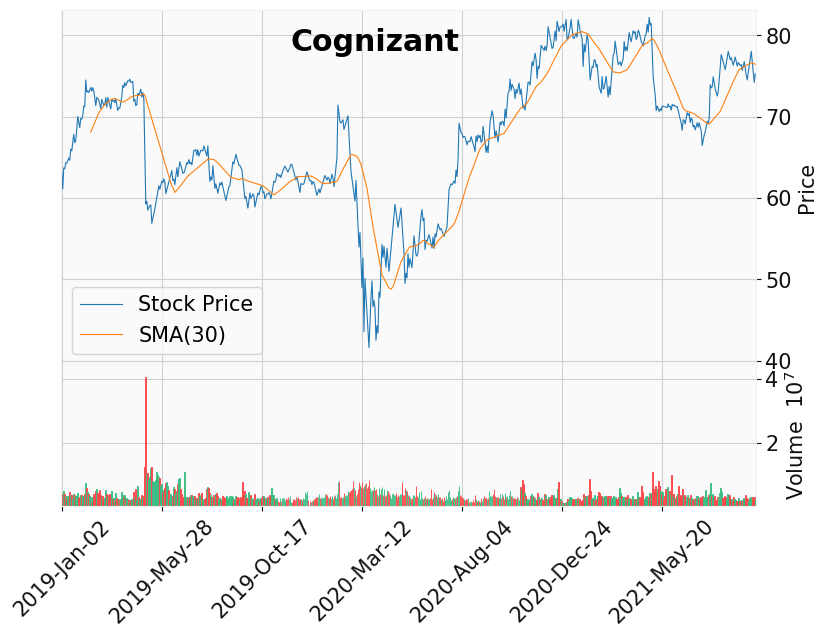

In [27]:
fig,ax = mpf.plot(df_cognizant ,volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'Cognizant', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/cg_chart.png", bbox_inches = 'tight')

In [28]:
print("Percentage increase in Cognizant share price over the period:", (df_cognizant.iloc[-1, 3]-df_cognizant.iloc[0, 3])*100/df_cognizant.iloc[0, 3])

Percentage increase in Cognizant share price over the period: 19.305748930099856


In [29]:
print("Maximum percentage change:", (max(df_cognizant.iloc[:, 3])-min(df_cognizant.iloc[:, 3]))*100/min(df_cognizant.iloc[:, 3]))

Maximum percentage change: 97.54865422858317


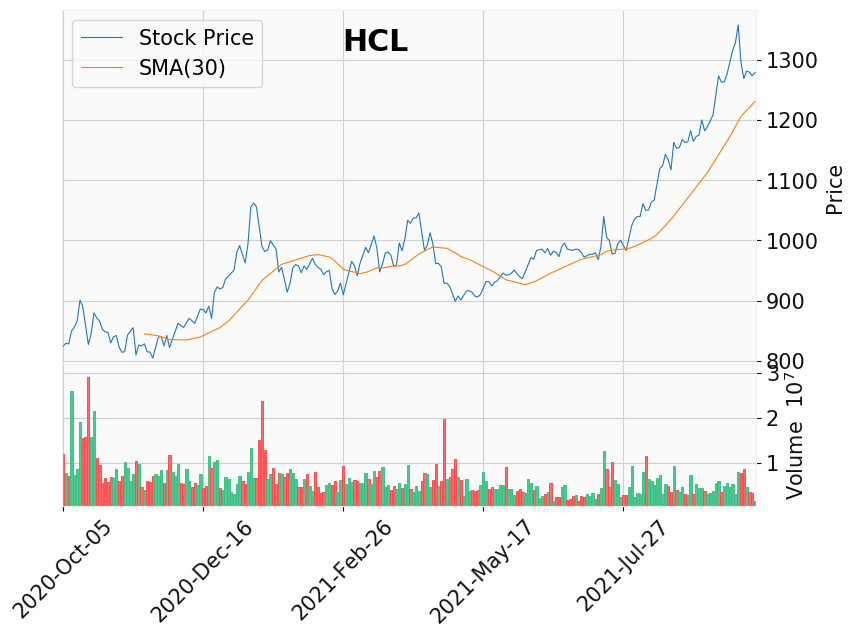

In [30]:
fig,ax = mpf.plot(df_hcl , volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'HCL', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/hcl_chart.png", bbox_inches = 'tight')

In [31]:
print("Percentage increase in HCL share price over the period:", (df_hcl.iloc[-1, 3]-df_hcl.iloc[0, 3])*100/df_hcl.iloc[0, 3])

Percentage increase in HCL share price over the period: 55.15651909502762


In [32]:
print("Maximum percentage change:", (max(df_hcl.iloc[:, 3])-min(df_hcl.iloc[:, 3]))*100/min(df_hcl.iloc[:, 3]))

Maximum percentage change: 68.81486188027885


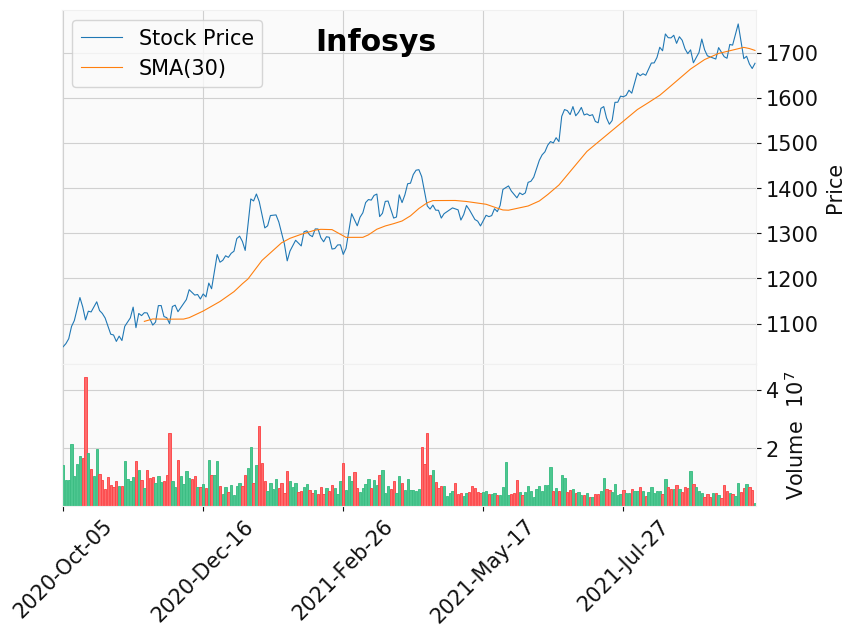

In [37]:
fig,ax = mpf.plot(df_infosys ,volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'Infosys', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/info_chart.png", bbox_inches = 'tight')

In [38]:
print("Percentage increase in Infosys share price over the period:", (df_infosys.iloc[-1, 3]-df_infosys.iloc[0, 3])*100/df_infosys.iloc[0, 3])

Percentage increase in Infosys share price over the period: 59.888440769079416


In [39]:
print("Maximum percentage change:", (max(df_infosys.iloc[:, 3])-min(df_infosys.iloc[:, 3]))*100/min(df_infosys.iloc[:, 3]))

Maximum percentage change: 68.19395998999144


### Bank stocks

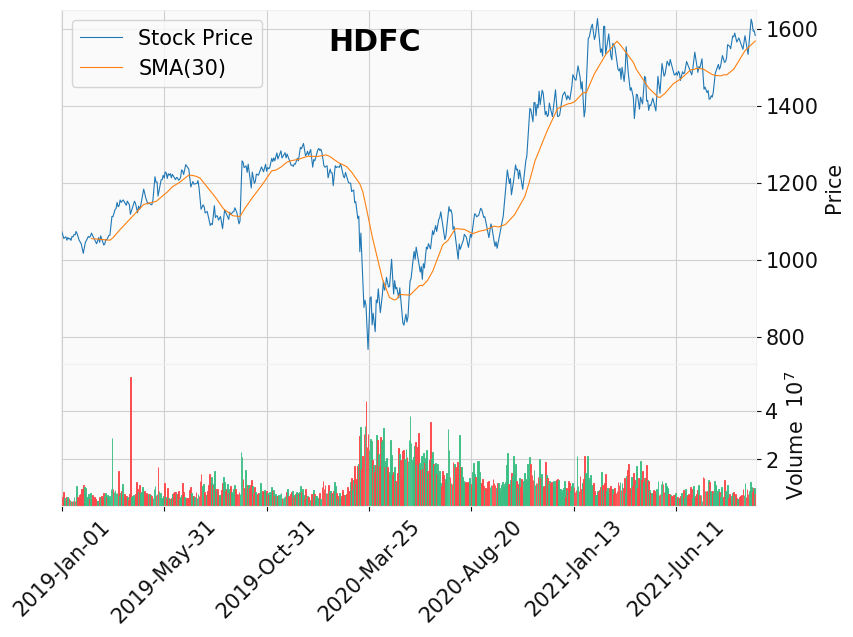

In [40]:
fig,ax = mpf.plot(df_hdfc ,volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'HDFC', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/hdfc_chart.png", bbox_inches = 'tight')

In [41]:
print("Percentage increase in HDFC share price over the period:", (df_hdfc.iloc[-1, 3]-df_hdfc.iloc[0, 3])*100/df_hdfc.iloc[0, 3])

Percentage increase in HDFC share price over the period: 47.3581191559538


In [42]:
print("Maximum percentage change:", (max(df_hdfc.iloc[:, 3])-min(df_hdfc.iloc[:, 3]))*100/min(df_hdfc.iloc[:, 3]))

Maximum percentage change: 111.88615325956253


Percentage increase in ICICI share price over the period: 90.33676316151201
Maximum percentage change: 157.04225352112675


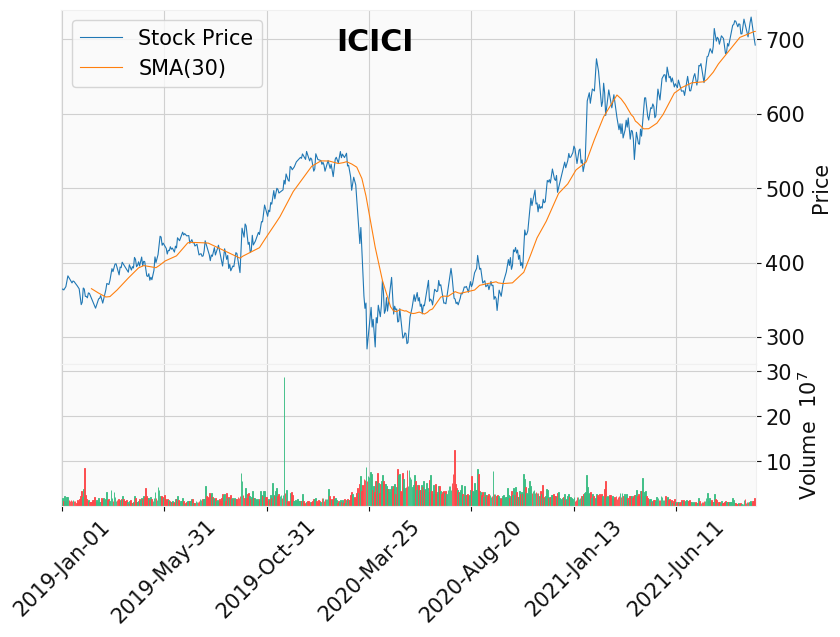

In [43]:
fig,ax = mpf.plot(df_icici ,volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'ICICI', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/icici_chart.png", bbox_inches = 'tight')

print("Percentage increase in ICICI share price over the period:", (df_icici.iloc[-1, 3]-df_icici.iloc[0, 3])*100/df_icici.iloc[0, 3])

print("Maximum percentage change:", (max(df_icici.iloc[:, 3])-min(df_icici.iloc[:, 3]))*100/min(df_icici.iloc[:, 3]))

Percentage increase in SBI share price over the period: 50.75099631339793
Maximum percentage change: 207.39144418728097


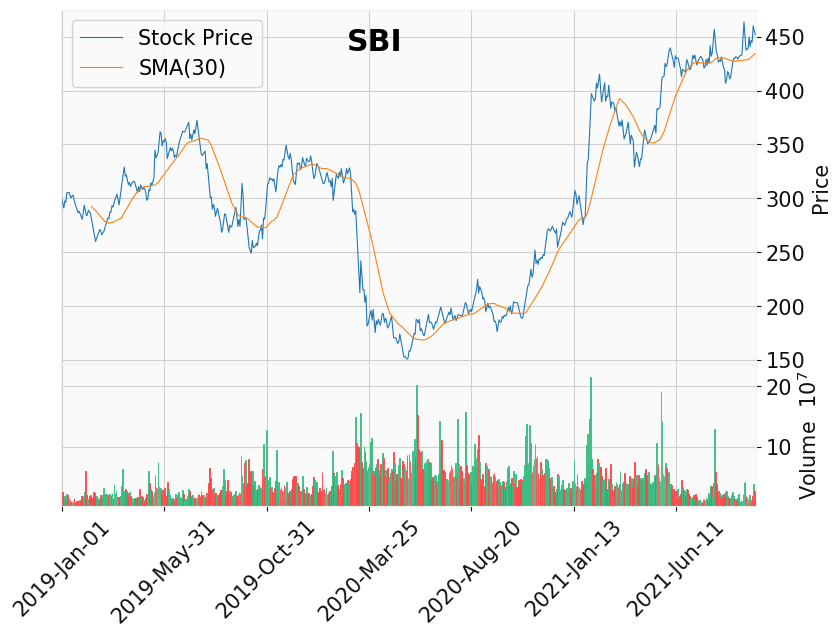

In [44]:
fig,ax = mpf.plot(df_sbi ,volume=True, type='line', mav=30, tight_layout=True, style=s, title = 'SBI', returnfig=True)
ax[0].legend(['Stock Price','SMA(30)'])
plt.savefig("Figures/sbi_chart.png", bbox_inches = 'tight')

print("Percentage increase in SBI share price over the period:", (df_sbi.iloc[-1, 3]-df_sbi.iloc[0, 3])*100/df_sbi.iloc[0, 3])

print("Maximum percentage change:", (max(df_sbi.iloc[:, 3])-min(df_sbi.iloc[:, 3]))*100/min(df_sbi.iloc[:, 3]))

### Currency

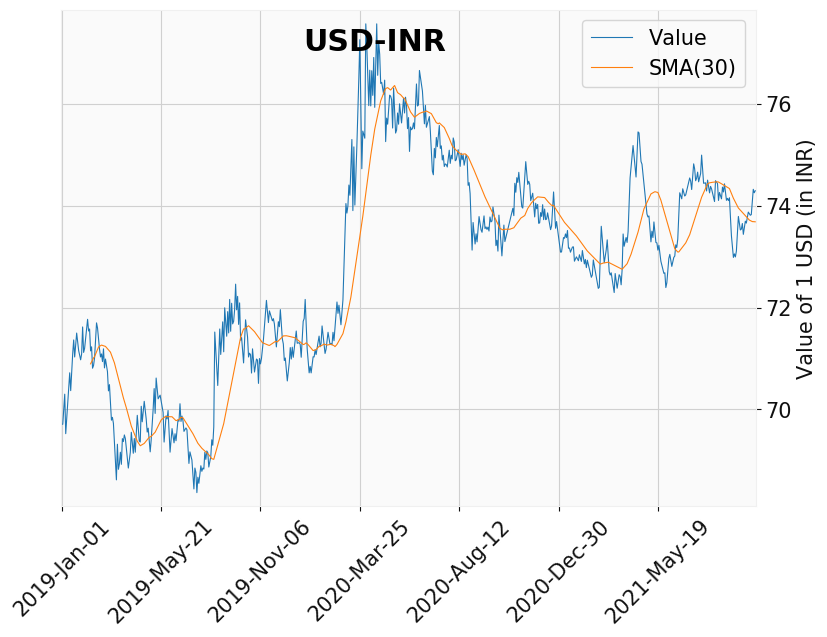

In [45]:
fig,ax = mpf.plot(df_currency ,volume=False, type='line', mav=30, tight_layout=True, style=s, title = 'USD-INR', returnfig=True)
ax[0].legend(['Value','SMA(30)'])
ax[0].set_ylabel('Value of 1 USD (in INR)')
plt.savefig("Figures/currency_chart.png", bbox_inches = 'tight')

### Comparison across stocks

#### Price

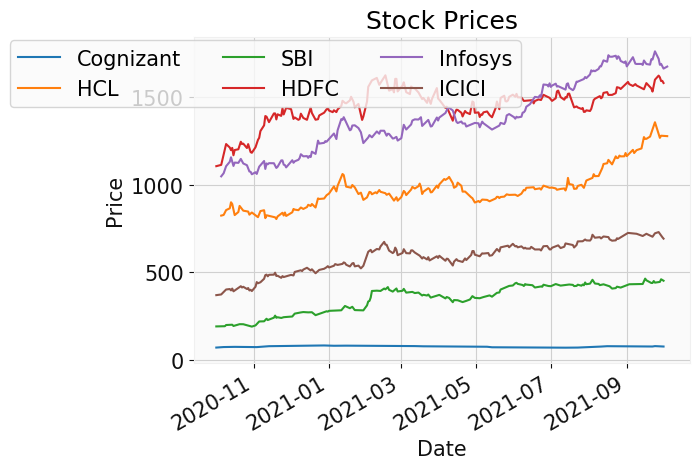

In [46]:
df_cognizant['Close'].loc['2020-10':].plot(label='Cognizant')
df_hcl['Close'].plot(label='HCL')
df_sbi['Close'].loc['2020-10':].plot(label='SBI')
df_hdfc['Close'].loc['2020-10':].plot(label='HDFC')
df_infosys['Close'].plot(label='Infosys')
df_icici['Close'].loc['2020-10':].plot(label='ICICI')
plt.title('Stock Prices')
plt.ylabel('Price')
plt.legend(loc='upper right', bbox_to_anchor=(0.68, 1.02), ncol = 3)
plt.savefig('Figures/all_price.png', bbox_inches = 'tight')

#### Market capitalization

In [47]:
df_cognizant['market_cap'] = df_cognizant['Close']*df_cognizant['Volume']
df_hcl['market_cap'] = df_hcl['Close']*df_hcl['Volume']
df_hdfc['market_cap'] = df_hdfc['Close']*df_hdfc['Volume']
df_icici['market_cap'] = df_icici['Close']*df_icici['Volume']
df_infosys['market_cap'] = df_infosys['Close']*df_infosys['Volume']
df_sbi['market_cap'] = df_sbi['Close']*df_sbi['Volume']

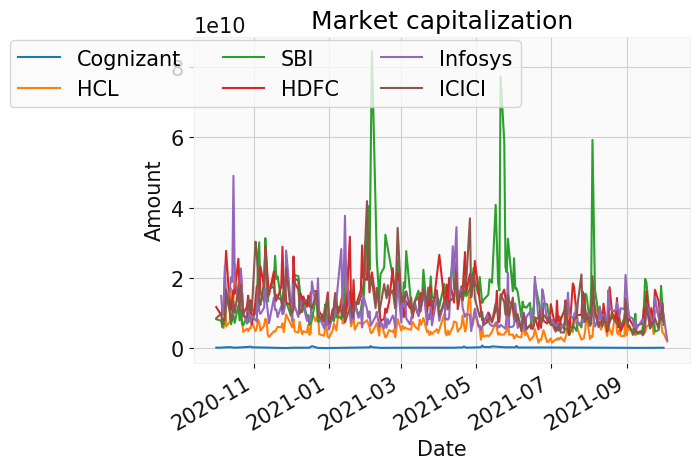

In [48]:
df_cognizant['market_cap'].loc['2020-10':].plot(label='Cognizant')
df_hcl['market_cap'].plot(label='HCL')
df_sbi['market_cap'].loc['2020-10':].plot(label='SBI')
df_hdfc['market_cap'].loc['2020-10':].plot(label='HDFC')
df_infosys['market_cap'].plot(label='Infosys')
df_icici['market_cap'].loc['2020-10':].plot(label='ICICI')
plt.title('Market capitalization')
plt.ylabel('Amount')
plt.legend(loc='upper right', bbox_to_anchor=(0.68, 1.02), ncol = 3)
plt.savefig('Figures/all_cap.png', bbox_inches = 'tight')

#### Correlation

In [49]:
cog = pd.DataFrame(df_cognizant['Close'])
hdfc = pd.DataFrame(df_hdfc['Close'])
sbi = pd.DataFrame(df_sbi['Close'])
icici = pd.DataFrame(df_icici['Close'])
infosys = pd.DataFrame(df_infosys['Close'])
hcl = pd.DataFrame(df_hcl['Close'])
inr = pd.DataFrame(df_currency['Close'])

In [50]:
df = pd.merge(pd.merge(cog,hdfc,on='Date'),sbi,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi']
df = pd.merge(df,icici,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici']
df = pd.merge(df,infosys,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici','Close_infosys']
df = pd.merge(df,hcl,on='Date')
df.columns = ['Close_cog','Close_hdfc','Close_sbi','Close_icici','Close_infosys','Close_hcl']
df = pd.merge(df,inr,on='Date')
df.columns = ['Cognizant','HDFC','SBI','ICICI','Infosys','HCL','INR']

In [51]:
df

Cognizant         HDFC         SBI       ICICI      Infosys  \
Date                                                                      
2020-10-05  70.930000  1114.349976  188.750000  373.100006  1048.699951   
2020-10-06  69.830002  1144.099976  191.600006  380.600006  1055.750000   
2020-10-07  72.239998  1162.250000  190.699997  382.649994  1066.550049   
2020-10-08  72.910004  1191.800049  191.500000  387.500000  1093.699951   
2020-10-09  73.080002  1233.550049  198.300003  401.500000  1106.800049   
...               ...          ...         ...         ...          ...   
2021-09-27  78.029999  1625.099976  446.600006  730.000000  1721.150024   
2021-09-28  76.360001  1615.050049  444.899994  717.150024  1687.099976   
2021-09-29  75.580002  1593.849976  460.000000  709.500000  1692.250000   
2021-09-30  74.209999  1594.949951  453.000000  700.849976  1675.199951   
2021-10-01  75.269997  1582.699951  451.649994  692.349976  1665.150024   

                    HCL        INR  
Date                                
2020-10-05   824.200012  73.322403  
2020-10-06   829.150024  73.108299  
2020-10-07   828.049988  73.815002  
2020-10-08   849.549988  73.542503  
2020-10-09   855.750000  73.280502  
...                 ...        ...  
2021-09-27  1295.199951  73.812897  
2021-09-28  1269.000000  73.825302  
2021-09-29  1281.199951  74.163300  
2021-09-30  1279.550049  74.321999  
2021-10-01  1273.750000  74.254402  

[240 rows x 7 columns]

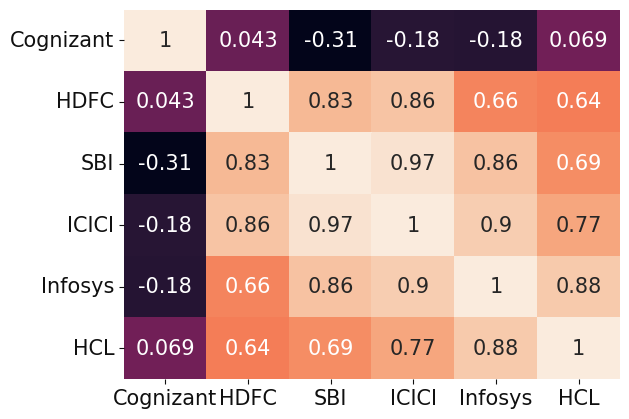

In [52]:
mat = df.iloc[:, :6].corr()
sns.heatmap(mat,annot=True, cbar = False)
plt.savefig("Figures/stock_corr.png")

### Rate of Return

In [53]:
df_cognizant['returns'] = (df_cognizant['Close']/df_currency['Adj Close'])/(df_cognizant['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1
df_hcl['returns'] = (df_hcl['Close']/df_currency['Adj Close'])/(df_hcl['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1
df_hdfc['returns'] = (df_hdfc['Close']/df_currency['Adj Close'])/(df_hdfc['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1
df_icici['returns'] = (df_icici['Close']/df_currency['Adj Close'])/(df_icici['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1
df_infosys['returns'] = (df_infosys['Close']/df_currency['Adj Close'])/(df_infosys['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1
df_sbi['returns'] = (df_sbi['Close']/df_currency['Adj Close'])/(df_sbi['Close'].shift(1)/df_currency['Adj Close'].shift(1))-1

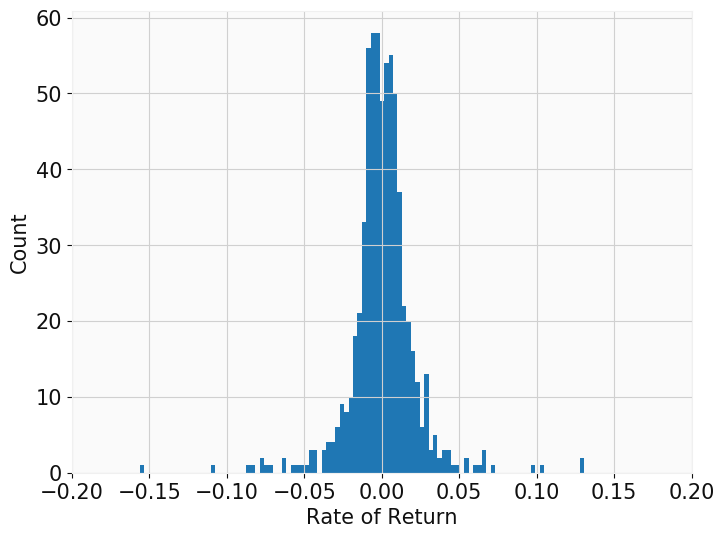

In [54]:
plt.figure(figsize = (8, 6))
df_cognizant['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_cognizant.png')

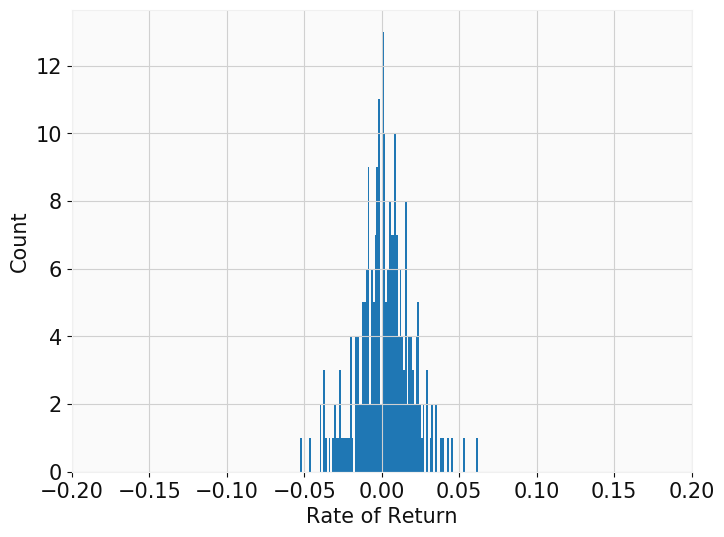

In [55]:
plt.figure(figsize = (8, 6))
df_hcl['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_hcl.png')

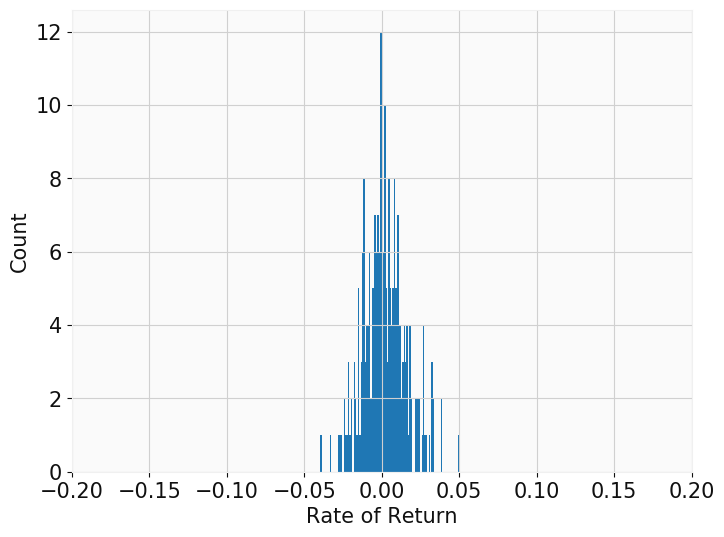

In [56]:
plt.figure(figsize = (8, 6))
df_infosys['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_infosys.png')

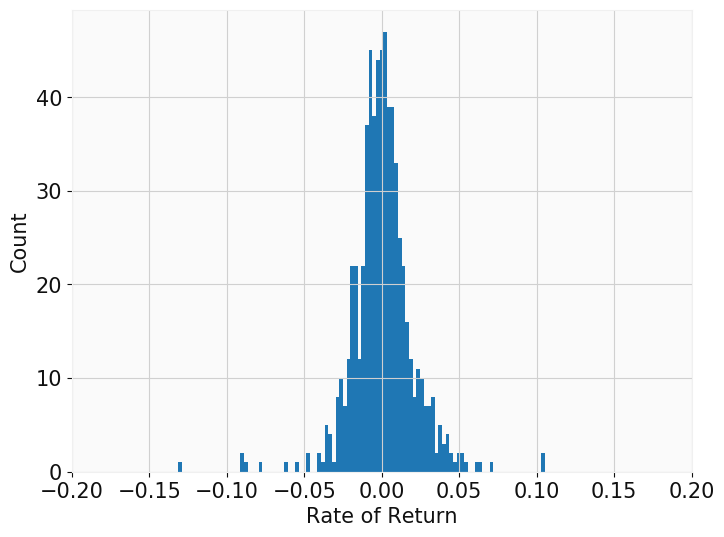

In [57]:
plt.figure(figsize = (8, 6))
df_hdfc['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_hdfc.png')

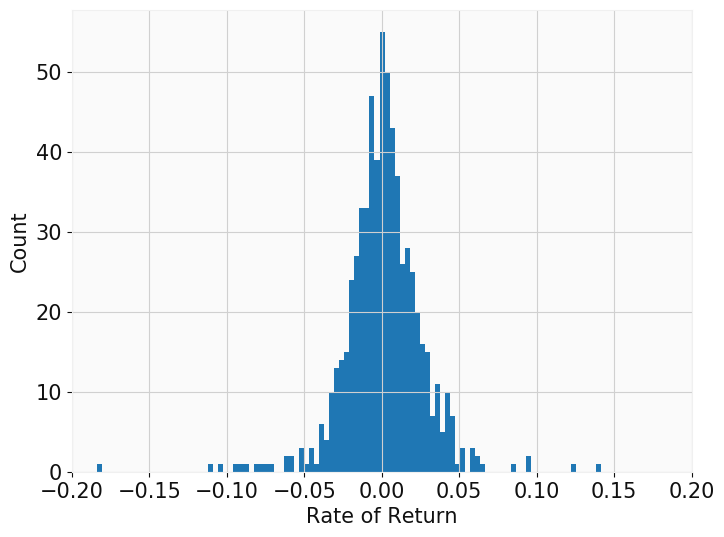

In [58]:
plt.figure(figsize = (8, 6))
df_icici['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_icici.png')

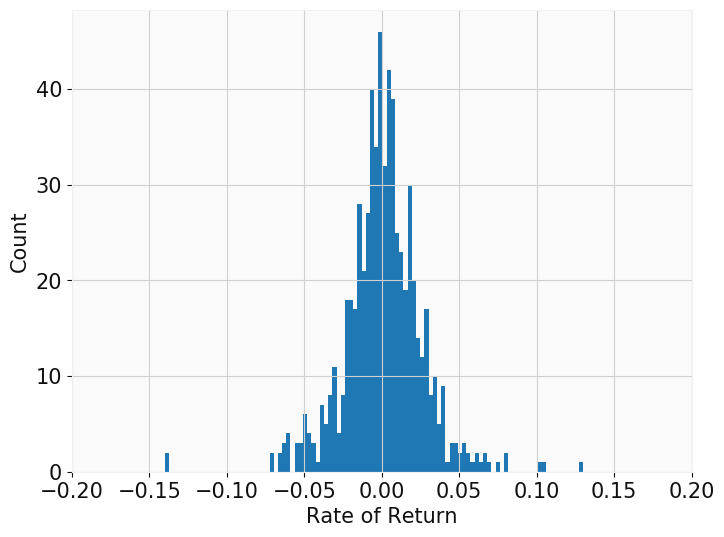

In [59]:
plt.figure(figsize = (8, 6))
df_sbi['returns'].hist(bins = 100)
plt.xlim(-0.2,0.2)
plt.xlabel('Rate of Return')
plt.ylabel('Count')
plt.savefig('Figures/ror_sbi.png')

In [60]:
print('cognizant',df_cognizant['returns'].mean())
print('hcl',df_hcl['returns'].mean())
print('infosys',df_infosys['returns'].mean())
print('hdfc',df_hdfc['returns'].mean())
print('icici',df_icici['returns'].mean())
print('sbi',df_sbi['returns'].mean())

cognizant 0.0004756089653231044
hcl 0.001836503584923399
infosys 0.001905673772731089
hdfc 0.0006150277239419385
icici 0.0011023990744476056
sbi 0.00099525413730868


In [61]:
print('cognizant',df_cognizant['returns'].std())
print('hcl',df_hcl['returns'].std())
print('infosys',df_infosys['returns'].std())
print('hdfc',df_hdfc['returns'].std())
print('icici',df_icici['returns'].std())
print('sbi',df_sbi['returns'].std())

cognizant 0.021741171533710423
hcl 0.017250313960387557
infosys 0.013870622955687993
hdfc 0.019889473841460246
icici 0.02564093426970809
sbi 0.025591563764709856


## Time series modelling

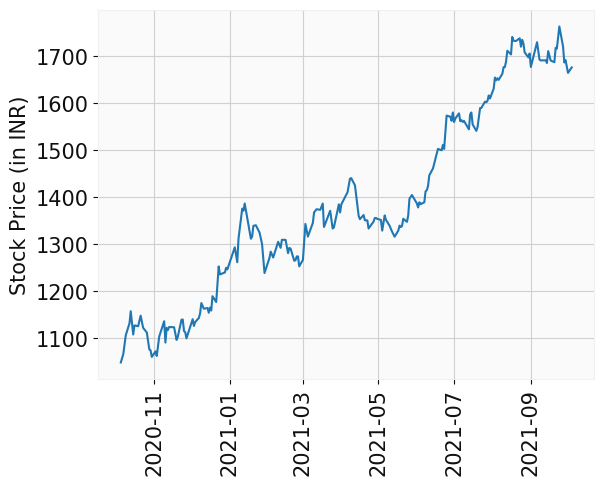

In [62]:
df = pd.DataFrame(df_infosys['Close'])


plt.plot(df.Close); 
plt.xticks(rotation=90)
plt.ylabel('Stock Price (in INR)')
plt.savefig('Figures/info_stk.png', bbox_inches = 'tight')

In [63]:
plt.style.available

['seaborn-deep',
 'seaborn-ticks',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn',
 'grayscale',
 'bmh',
 'seaborn-colorblind',
 'seaborn-notebook',
 'tableau-colorblind10',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-dark-palette',
 'classic',
 '_classic_test',
 'seaborn-paper',
 'seaborn-muted',
 'dark_background',
 'seaborn-dark',
 'seaborn-talk',
 'fast',
 'ggplot',
 'seaborn-whitegrid']

In [64]:
plt.style.use(['classic'])

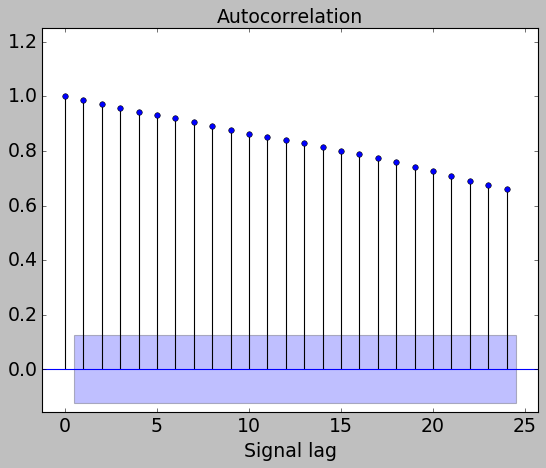

In [174]:
fig, ax = plt.subplots()
plot_acf(df.Close, ax = ax, auto_ylims = True, bartlett_confint = False)
plt.xlabel('Signal lag')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(17)
plt.savefig('Figures/acf1.png', bbox_inches = 'tight')

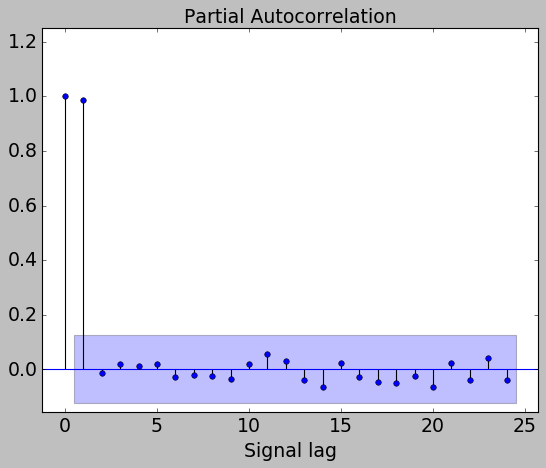

In [173]:
fig, ax = plt.subplots()
plot_pacf(df.Close, ax = ax, auto_ylims = True, method='ywm')
plt.xlabel('Signal lag')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(17)
plt.savefig('Figures/pacf1.png', bbox_inches = 'tight')

### Performing tests to confirm the order

In [67]:
y = df.Close

## Adf Test
print(ndiffs(y, test='adf'))  # 1

# KPSS test
print(ndiffs(y, test='kpss'))  # 1

# PP test:
print(ndiffs(y, test='pp'))  # 1

1
1
1


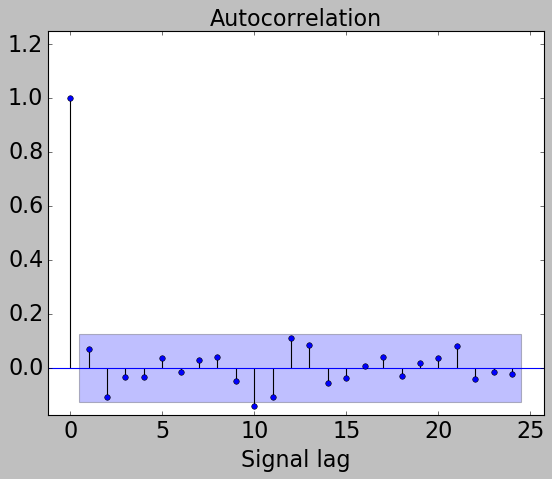

In [172]:
fig, ax = plt.subplots()
plot_acf(df.Close.diff().dropna(), ax = ax, auto_ylims = True, bartlett_confint = False)
ax.set_xlabel('Signal lag')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('Figures/acf2.png', bbox_inches = 'tight')

/home/blaze010/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


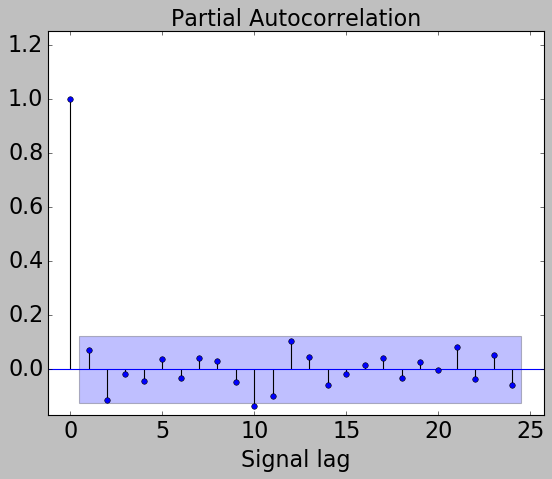

In [171]:
fig, ax = plt.subplots()
plot_pacf(df.Close.diff().dropna(), ax = ax, auto_ylims = True)
ax.set_xlabel('Signal lag')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('Figures/pacf2.png', bbox_inches = 'tight')

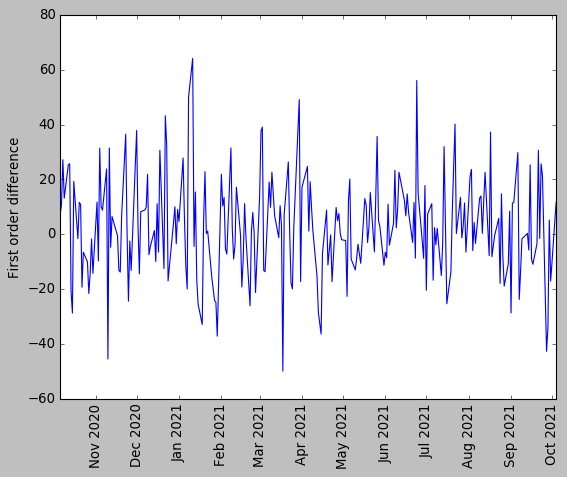

In [70]:
plt.plot(df.Close.diff()); 
plt.xticks(rotation=90)
plt.ylabel("First order difference")
plt.savefig("Figures/first_diff.png", bbox_inches = 'tight')

In [71]:
training_data_len = int(np.ceil( len(df) * .80 ))

In [72]:
train = df.iloc[:training_data_len]
test = df.iloc[training_data_len:]

In [159]:
model = ARIMA(train.Close, order=(0,1,0), trend = 't')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  199
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -857.310
Date:                Tue, 15 Nov 2022   AIC                           1718.621
Time:                        17:23:59   BIC                           1725.197
Sample:                             0   HQIC                          1721.283
                                - 199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7361      1.328      2.060      0.039       0.133       5.339
sigma2       337.5529     30.115     11.209      0.000     278.528     396.578
Ljung-Box (L1) (Q):                   1.76   Jarque-

/home/blaze010/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/blaze010/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/blaze010/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/blaze010/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


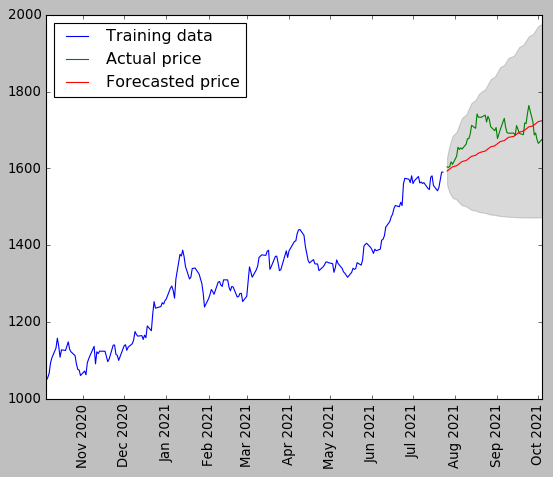

In [196]:
op = model_fit.get_forecast(len(test))

predictions = list((op.predicted_mean).values)
conf = np.array([list(el) for el in list(op.conf_int(alpha = 0.05).values)])


fc_series = pd.Series(predictions, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure()
plt.plot(train, label='Training data')
plt.plot(test, label='Actual price')
plt.plot(fc_series, label='Forecasted price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.savefig('Figures/arima_pred.png', bbox_inches = 'tight')

## LSTM Model

In [175]:
data = df_infosys.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))

In [177]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [178]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        pass

        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [192]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
139/139 [==============================] - 7s 32ms/step - loss: 0.0480
Epoch 2/2
139/139 [==============================] - 6s 43ms/step - loss: 0.0279


In [198]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 29ms/step


35.5844279690076

/tmp/ipykernel_94717/3527056061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


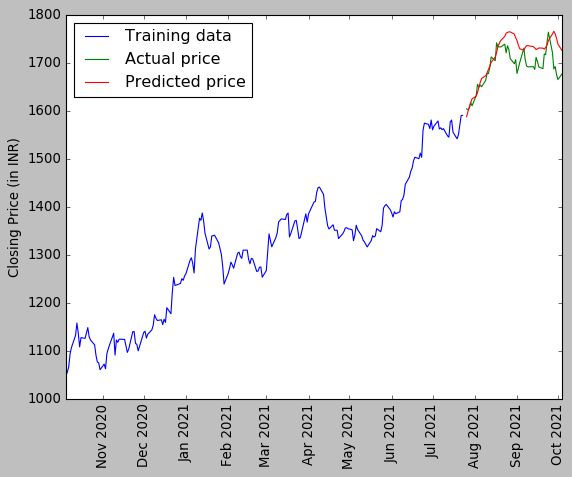

In [199]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.ylabel('Closing Price (in INR)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training data', 'Actual price', 'Predicted price'], loc = 'upper left')
plt.xticks(rotation=90)
plt.savefig('Figures/lstm_pred', bbox_inches = 'tight')